In [1]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [2]:
import pandas as pd

In [3]:
heart_data = pd.read_csv('heart_data.csv')

In [4]:
heart_data.tail()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
265,52,1,3,172,199,1,0,162,0,5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,13,2,0,3,1
268,57,1,4,140,192,0,0,148,0,4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,15,2,3,3,2


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Classifying 'no' as -1 and 'yes' as 1
y = heart_data.iloc[0:269, 1].values

In [6]:
y = np.where(y==1, -1, 1)

In [7]:
X = heart_data.iloc[0:269, [3,4]].values

In [8]:
import seaborn

In [9]:
seaborn.set(style='ticks')

X = X/100
data_frame = pd.DataFrame({
    'RestBloodPressure': X[0:269, 0],
    'SerumCholestoral': X[0:269, 1],
    'Sex': heart_data.iloc[0:269, 1]
})


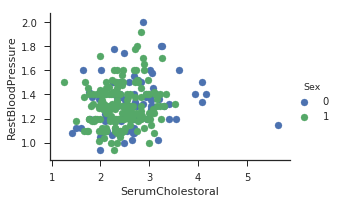

In [13]:
fg = seaborn.FacetGrid(data = data_frame,hue = 'Sex', aspect=1.42)
fg.map(plt.scatter, 'SerumCholestoral','RestBloodPressure').add_legend()

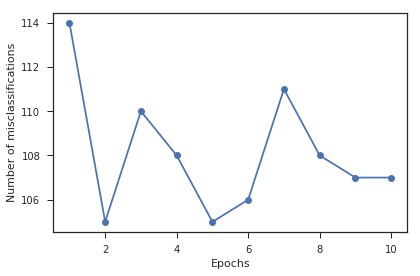

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

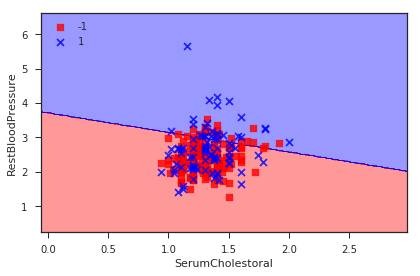

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('SerumCholestoral')
plt.ylabel('RestBloodPressure')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()